ANALYSIS OF THE DRUG CONSUMPTIONS IN UK

In below machine learning problem is around drugs. According to David Nutt, a psychiatrist from Imperial College London(details in the file source.txt), the top 5 are as follows:

5. Alhohol
4. Barbiturates
3. Nicotine
2. Cocaine
1. Heroine

Let's focus on most addictive one: Heroine.

1. READING DATA AND IMPORT NECCESARY LIBRARIES

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv("D:\\CODS\\DataScience_Portfolio_Projects\\! IN PROGRESS\\6. CLASSIFICATION - Drug consuption\Data\\drug_consumption.data_.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
df.shape

(1885, 32)

2. DATA PREPARATION

In [4]:
# Adding names for data frame columns
df.columns=["Id","Age","Gender", "Education", "Country", "Ethnicity", "Nscore(Neuroticism)", "Escore(Extraversion)", "Oscore(Openness)","Ascore(Agreeableness)",
            "Cscore(Conscientiousness)", "Impulsive", "SS", "Alhohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ectasy", "Heroine", "Ketamine",
            "Legalh", "LSD", "Meth", "Mushroom", "Nicotine", "Semer", "VSA"]

In [5]:
df.head()

,Id,Age,Gender,Education,Country,Ethnicity,Nscore(Neuroticism),Escore(Extraversion),Oscore(Openness),Ascore(Agreeableness),...,Ectasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
# Displaing all columns
df.columns

Index(['Id', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Nscore(Neuroticism)', 'Escore(Extraversion)', 'Oscore(Openness)',
       'Ascore(Agreeableness)', 'Cscore(Conscientiousness)', 'Impulsive', 'SS',
       'Alhohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ectasy', 'Heroine', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushroom', 'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [7]:
# Lets focus in our analysis on the attributes like Age, Gender etc. from demographinc point of view
choose_columns = ["Id", "Age","Gender","Education", "Country","Ethnicity", "Heroine"]
dfDemogr = df[choose_columns]
dfDemogr.set_index("Id", inplace=True)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine
Id,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,CL0


In [8]:
dfDemogr.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Heroine    1885 non-null   object 
dtypes: float64(5), object(1)
memory usage: 103.1+ KB


In [9]:
dfDemogr.nunique()

Age          6
Gender       2
Education    9
Country      7
Ethnicity    7
Heroine      7
dtype: int64

In [10]:
# Making simple function for changing values from Age column
def PatternAge(age):
    age_patterns = {
        -0.95197: 1,
        -0.07854: 2,
         0.49788: 3,
         1.09449: 4,
         1.82213: 5,
         2.59171: 6
    }
    return age_patterns.get(age)

# Applying function on our data set with added rank number    
dfDemogr["AgeRanks"] = dfDemogr["Age"].apply(PatternAge)

In [11]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-0.95197 : "18-24", -0.07854 : "25-34", 0.49788 : "35-44", 1.09449 : "45-54", 1.82213 : "55-64", 2.59171: "65+"}
dfDemogr.loc[:, 'Age'] = dfDemogr['Age'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks
Id,,,,,,,
1,35-44,0.48246,-0.05921,0.96082,0.12600,CL0,3
2,25-34,-0.48246,1.98437,0.96082,-0.31685,CL0,2
3,35-44,-0.48246,-0.05921,0.96082,-0.31685,CL0,3
4,18-24,0.48246,1.16365,0.96082,-0.31685,CL0,1
5,35-44,0.48246,1.98437,0.96082,-0.31685,CL0,3


In [12]:
# Making simple function for changing values from Gender column
def PatternGender(gen):
    if gen == -0.48246:
        return 1
    else:
        return 2

# Applying function on our data set with added rank number        
dfDemogr["GenderRanks"] = dfDemogr["Gender"].apply(PatternGender)

In [13]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {0.48246 : "Female", -0.48246 : "Male"}
dfDemogr.loc[:, 'Gender'] = dfDemogr['Gender'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks
Id,,,,,,,,
1,35-44,Female,-0.05921,0.96082,0.12600,CL0,3,2
2,25-34,Male,1.98437,0.96082,-0.31685,CL0,2,1
3,35-44,Male,-0.05921,0.96082,-0.31685,CL0,3,1
4,18-24,Female,1.16365,0.96082,-0.31685,CL0,1,2
5,35-44,Female,1.98437,0.96082,-0.31685,CL0,3,2


In [14]:
# Making simple function for changing values from Educationcolumn
def PatternEdu(edu):
    edu_patterns = {
    -2.43591: 1,
    -1.73790: 2,
    -1.43719: 3,
    -1.22751: 4,
    -0.61113: 5,
    -0.05921: 6,
     0.45468: 7,
     1.16365: 8,
     1.98437: 9
    }
    return edu_patterns.get(edu)

# Applying function on our data set with added rank number        
dfDemogr["EducationRanks"] = dfDemogr["Education"].apply(PatternEdu)

In [15]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-2.43591 : "Left school < 16 years", -1.73790  : "Left school at 16", -1.43719 : "Left school at 17", -1.22751 : "Left school at 18", 
           -0.61113 : "Some college or university", -0.05921 : "Professional certificate/ diploma", 0.45468 : "University degree", 1.16365 : "Masters degree", 
           1.98437 : "Doctorate degree"}
dfDemogr.loc[:, 'Education'] = dfDemogr['Education'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks
Id,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,0.96082,0.12600,CL0,3,2,6
2,25-34,Male,Doctorate degree,0.96082,-0.31685,CL0,2,1,9
3,35-44,Male,Professional certificate/ diploma,0.96082,-0.31685,CL0,3,1,6
4,18-24,Female,Masters degree,0.96082,-0.31685,CL0,1,2,8
5,35-44,Female,Doctorate degree,0.96082,-0.31685,CL0,3,2,9


In [16]:
# Making simple function for changing values from Country column
def PatternCoutry(cou):
    cou_patterns = {
    -0.09765: 1,
     0.24923: 2,
    -0.46841: 3,
    -0.28519: 4,
     0.21128: 5,
     0.96082: 6,
    -0.57009: 7
    }
    return cou_patterns.get(cou)
   
# Applying function on our data set with added rank number    
dfDemogr["CountryRanks"] = dfDemogr["Country"].apply(PatternCoutry)

In [17]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-0.09765 : "Australia", 0.24923  : "Canada", -0.46841 : "New Zealand", -0.28519 : "Other",  0.21128 : "Irleand", 0.96082 : "UK", -0.57009 : "USA"}
dfDemogr.loc[:, 'Country'] = dfDemogr['Country'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks
Id,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,0.12600,CL0,3,2,6,6
2,25-34,Male,Doctorate degree,UK,-0.31685,CL0,2,1,9,6
3,35-44,Male,Professional certificate/ diploma,UK,-0.31685,CL0,3,1,6,6
4,18-24,Female,Masters degree,UK,-0.31685,CL0,1,2,8,6
5,35-44,Female,Doctorate degree,UK,-0.31685,CL0,3,2,9,6


In [18]:
# Making simple function for changing values from Ethnicity column
def PatternEntnicity(etn):
    etn_pattern = {
    -0.50212: 1,
    -1.10702: 2,
     1.90725: 3,
     0.12600: 4,
    -0.22166: 5,
     0.11440: 6,
    -0.31685: 7
    }
    return etn_pattern.get(etn)

# Applying function on our data set with added rank number      
dfDemogr["EtnicityRanks"] = dfDemogr["Ethnicity"].apply(PatternEntnicity)

In [19]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-0.50212 : "Asian", -1.10702  : "Black", 1.90725 : "Mixed-Black/Asian", 0.12600 : "Mixed-White/Asian",  -0.22166  : "Mixed-White/Black", 
           0.11440 : "Other", -0.31685 : "White"}
dfDemogr.loc[:, 'Ethnicity'] = dfDemogr['Ethnicity'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks
Id,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,CL0,3,2,6,6,4
2,25-34,Male,Doctorate degree,UK,White,CL0,2,1,9,6,7
3,35-44,Male,Professional certificate/ diploma,UK,White,CL0,3,1,6,6,7
4,18-24,Female,Masters degree,UK,White,CL0,1,2,8,6,7
5,35-44,Female,Doctorate degree,UK,White,CL0,3,2,9,6,7


In [20]:
# Making simple function for changing values from Heroine column
def PatternHeroine(her):
    if her == "CL0":
        return 0
    else:
        return 1

# Applying function on our data set with added rank number   
dfDemogr["HeroineRanks"] = dfDemogr["Heroine"].apply(PatternHeroine)

In [21]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {"CL0" : "Never Used", "CL1" : "Used at least one", "CL2" : "Used at least one", "CL3": "Used at least one",  "CL4" : "Used at least one", 
           "CL5" : "Used at least one", "CL6" : "Used at least one"}
dfDemogr['Heroine'] = dfDemogr['Heroine'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks,HeroineRanks
Id,,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,Never Used,3,2,6,6,4,0
2,25-34,Male,Doctorate degree,UK,White,Never Used,2,1,9,6,7,0
3,35-44,Male,Professional certificate/ diploma,UK,White,Never Used,3,1,6,6,7,0
4,18-24,Female,Masters degree,UK,White,Never Used,1,2,8,6,7,0
5,35-44,Female,Doctorate degree,UK,White,Never Used,3,2,9,6,7,0


3. UNDERSTANDING DATA

In [22]:
# Making of the data frame with people who used Heorine at least one 
dfUseHeroine = dfDemogr[dfDemogr.HeroineRanks == 1]
dfUseHeroine.head()


,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks,HeroineRanks
Id,,,,,,,,,,,,
24,45-54,Male,Left school at 16,UK,White,Used at least one,4,1,2,6,7,1
31,45-54,Male,Left school at 16,UK,White,Used at least one,4,1,2,6,7,1
35,35-44,Male,University degree,USA,Other,Used at least one,3,1,7,7,6,1
59,45-54,Male,Left school at 18,UK,White,Used at least one,4,1,4,6,7,1
82,55-64,Female,University degree,UK,White,Used at least one,5,2,7,6,7,1


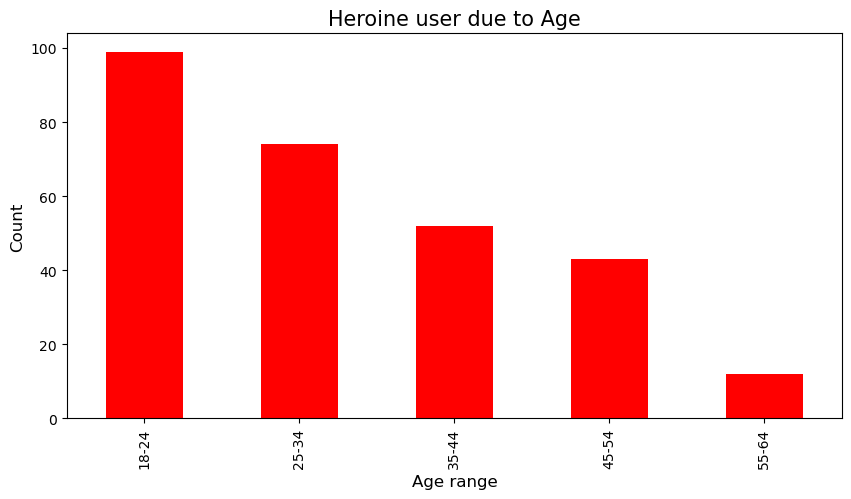

In [23]:
# Plotting Heroine user due to Age
plt.figure(figsize=(10,5))
ax = dfUseHeroine.Age.value_counts() \
                           .plot(kind="bar", color = "red")
ax.set_title("Heroine user due to Age", fontsize = 15)
ax.set_xlabel("Age range", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

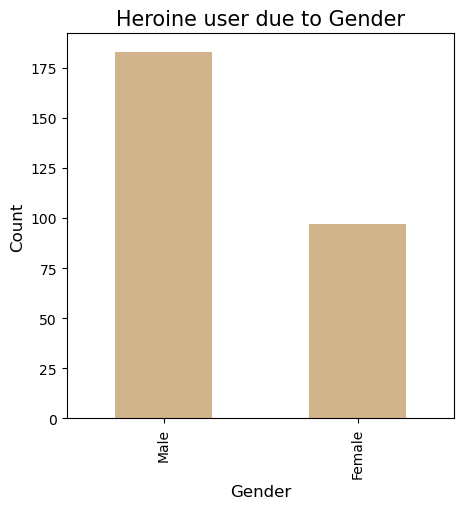

In [24]:
# Plotting Heroine user due to Gender
plt.figure(figsize=(5,5))
ax = dfUseHeroine.Gender.value_counts() \
                           .plot(kind="bar", color = "tan")
ax.set_title("Heroine user due to Gender", fontsize = 15)
ax.set_xlabel("Gender", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

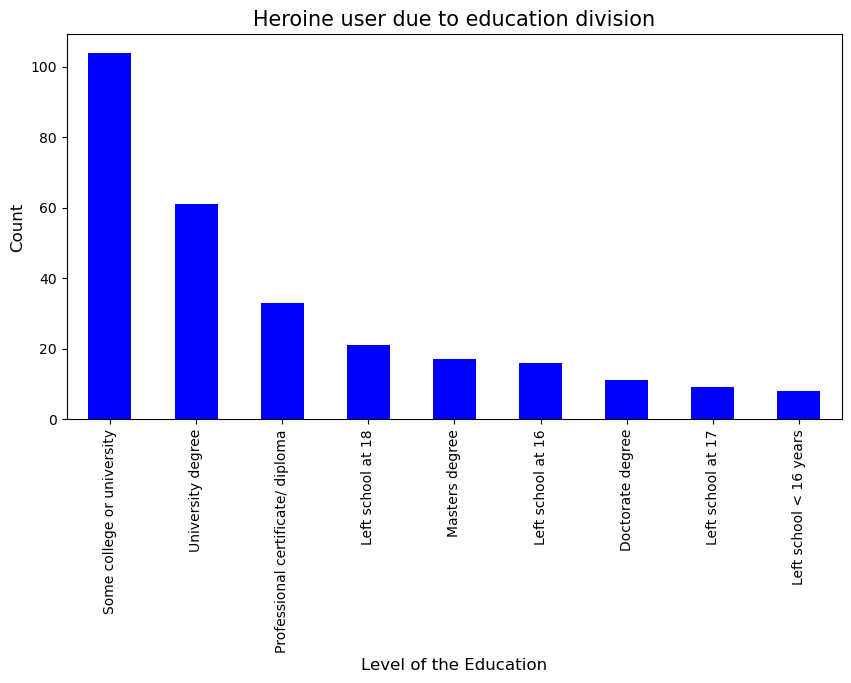

In [25]:
# Plotting Heroine user due to Education
plt.figure(figsize=(10,5))
ax = dfUseHeroine.Education.value_counts() \
                           .plot(kind="bar", color = "blue")
ax.set_title("Heroine user due to education division", fontsize = 15)
ax.set_xlabel("Level of the Education", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

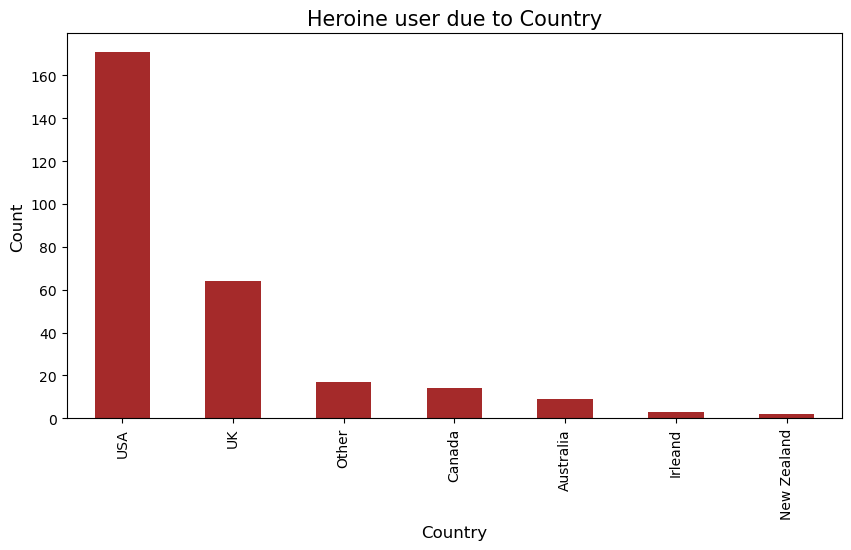

In [26]:
# Plotting Heroine user due to Country
plt.figure(figsize=(10,5))
ax = dfUseHeroine.Country.value_counts() \
                           .plot(kind="bar", color = "brown")
ax.set_title("Heroine user due to Country", fontsize = 15)
ax.set_xlabel("Country", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

4. BUILDING MACHINE LEARNING MODEL

In [27]:
# Checking if our data frame IS balanaced od NOT
dfUseHeroine = dfDemogr[dfDemogr.HeroineRanks == 1]  
dfNotUseHeroine = dfDemogr[dfDemogr.HeroineRanks == 0]

thresholdForUseHeroine = round((len(dfUseHeroine) / len(dfDemogr)), 2)
thresholdForNOTUseHeroine = round((len(dfNotUseHeroine ) / len(dfDemogr)), 2)

# Counting ratio between user with USe and Not Use Haroine
ratio = round((len(dfNotUseHeroine.HeroineRanks==0) / len(dfUseHeroine.HeroineRanks == 1)),2)

print(f"In our data set there are {thresholdForNOTUseHeroine* 100} % data with has 0 value (never use Heroine), and {thresholdForUseHeroine  * 100} % data with value 1 (use Heroine at least one).")
print(f"For using one of the method with handle with unbalanced (like for example Undersamplig or Oversmapling method) data set should has proporcion between classes at 1:10.")
print(f"In our data set the ratio between classes is equal 1:{ratio}.")

In our data set there are 85.0 % data with has 0 value (never use Heroine), and 15.0 % data with value 1 (use Heroine at least one).
For using one of the method with handle with unbalanced (like for example Undersamplig or Oversmapling method) data set should has proporcion between classes at 1:10.
In our data set the ratio between classes is equal 1:5.73.


In [28]:
# Use Oversampling method for balance classes in our data set
from sklearn.utils import resample

# Majority class is:
dfNotUseHeroine 

# Minority class is:
dfUseHeroine 

dfUseHeroine_upsampled = resample(dfUseHeroine,
                                  replace=True,
                                  n_samples=1605,
                                  random_state=42)

df_upsampled = pd.concat([dfUseHeroine_upsampled, dfNotUseHeroine])
df_upsampled.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks,HeroineRanks
Id,,,,,,,,,,,,
859,18-24,Male,Professional certificate/ diploma,USA,Mixed-White/Asian,Used at least one,1,1,6,7,4,1
1861,18-24,Male,Some college or university,USA,White,Used at least one,1,1,5,7,7,1
872,25-34,Male,University degree,USA,White,Used at least one,2,1,7,7,7,1
767,18-24,Male,Some college or university,USA,White,Used at least one,1,1,5,7,7,1
1222,18-24,Female,Professional certificate/ diploma,USA,White,Used at least one,1,2,6,7,7,1


In [29]:

# Importing libararires for split data into train and test
from sklearn.model_selection import train_test_split


In [30]:
# Choosing X and y variables
X = df_upsampled.iloc[:,6:11].values
y = df_upsampled.iloc[:,-1].values

In [31]:
# Splitting X and Y variables for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [32]:
# Importing libraries for classification methods
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [33]:
# MODEL BUILD (BASELINE VALIDATION PERFOMANCE)
# Checking performance with most common classification methods with default parameters.

# Checking Random Forest classifier
model_rf = RandomForestClassifier()
cv = cross_val_score(model_rf, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Random Forest perfomance on default set: {cv_mean } %")

# Checking Logistic Regression classifier
model_lr = LogisticRegression()
cv = cross_val_score(model_lr, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Logistic Regression perfomance on default set: {cv_mean} %")

# Checking Support Vector Machine classifier
model_svm = svm.SVC()
cv = cross_val_score(model_svm, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Support Vector Machine perfomance on default set: {cv_mean} %")

# Checking Decision Tree classifier
model_dt = DecisionTreeClassifier()
cv = cross_val_score(model_dt, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Decision Tree perfomance on default set: {cv_mean} %")

# Checking Naive Bayes classifier
model_gnb = GaussianNB()
cv = cross_val_score(model_gnb, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Naive Bayes perfomance on default set: {cv_mean} %")

# Checking K-Nearest Neighbors classifier
model_knn = KNeighborsClassifier()
cv = cross_val_score(model_knn, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"K-N Neighbor perfomance on default set: {cv_mean} %")

# Checking XGBoost classifier
model_xgb = XGBClassifier()
cv = cross_val_score(model_xgb, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Xtreme Gradien Boosting perfomance on default set:  {cv_mean} %")

___
[0.76264591 0.80544747 0.79571984 0.76803119 0.77582846]
Random Forest perfomance on default set: 78.15 %
___
[0.61284047 0.59922179 0.60505837 0.61988304 0.6374269 ]
Logistic Regression perfomance on default set: 61.49 %
___
[0.67315175 0.70622568 0.692607   0.69590643 0.66666667]
Support Vector Machine perfomance on default set: 68.69 %
___
[0.76459144 0.79961089 0.79377432 0.76023392 0.78557505]
Decision Tree perfomance on default set: 78.08 %
___
[0.59533074 0.57392996 0.61673152 0.62183236 0.61403509]
Naive Bayes perfomance on default set: 60.44 %
___
[0.71400778 0.73735409 0.73929961 0.7037037  0.71539961]
K-N Neighbor perfomance on default set: 72.2 %
___
[0.74708171 0.79377432 0.78793774 0.7582846  0.76608187]
Xtreme Gradien Boosting perfomance on default set:  77.06 %


In [34]:
# From list above in our data set the best perfomance. Lets explore parameteres for tweek results from best 3 machine learning models:
from sklearn.model_selection import GridSearchCV 

In [35]:
# Searching best parameters for Random Forest: 
model_rf = RandomForestClassifier()
parameters = {'n_estimators': [50, 100, 150],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]
              }
grid_rf = GridSearchCV(estimator = model_rf,  
                       param_grid = parameters,
                       cv = 5,
                       verbose=True,
                       n_jobs = -1)


best_clf_rf = grid_rf.fit(X_train, y_train)
print("___________________")
print(f"Best parameters for Random Forest classifier: {best_clf_rf.best_params_}")
print(f"Best score for Random Forest classifier {best_clf_rf.best_score_}")
print("___________________")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
___________________
Best parameters for Random Forest classifier: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest classifier 0.7823135443450824
___________________


In [36]:
# Searching best parameters for Decision Tree: 
model_dt = DecisionTreeClassifier()
parameters  = { 'max_depth': [3, 5, 7, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'min_impurity_decrease': [0.0, 0.1, 0.2],
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random']
               } 
grid_dt= GridSearchCV(estimator = model_dt,  
                       param_grid = parameters,
                       cv = 5,
                       verbose=True,
                       n_jobs = -1) 

best_clf_dt = grid_dt.fit(X_train, y_train)
print("___________________")
print(f"Best parameters for Support Vector Machine classifier: {best_clf_dt.best_params_}")
print(f"Best score for Support Vector Machine classifier: {best_clf_dt.best_score_}")
print("___________________")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
___________________
Best parameters for Support Vector Machine classifier: {'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score for Support Vector Machine classifier: 0.7795890504471295
___________________


In [37]:
# Searching best parameters for XGBoost: 
model_xgb = XGBClassifier()
parameters = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100, 200],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.8, 1.0],
              'gamma': [0, 0.1],
              'reg_alpha': [0, 0.1],
              'reg_lambda': [1, 10]
              }

grid_xgb = GridSearchCV(estimator = model_xgb,  
                        param_grid = parameters,
                        cv = 5,
                        verbose=True,
                        n_jobs = -1) 

best_clf_xgb= grid_xgb.fit(X_train, y_train)
print("___________________")
print(f"Best parameters for Xtreme Boosting classifier: {best_clf_xgb.best_params_}")
print(f"Best score for for Xtreme Boosting classifier: {best_clf_xgb.best_score_}")
print("___________________")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
___________________
Best parameters for Xtreme Boosting classifier: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best score for for Xtreme Boosting classifier: 0.777639732708338
___________________


In [38]:
# Best model for these data with score 78 % is for Random Forest.

In [39]:
# Model Random forest 
model_rf_ = RandomForestClassifier(bootstrap = True, max_depth = None,  max_features = 'log2', min_samples_leaf = 1,  min_samples_split = 2,  n_estimators = 150)
model_rf_.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=150)

In [40]:
y_predict = model_rf_.predict(X_test)

In [41]:
# Making confusion martix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=best_clf_rf.predict(X_test))
cm

array([[214,  92],
       [ 47, 289]], dtype=int64)

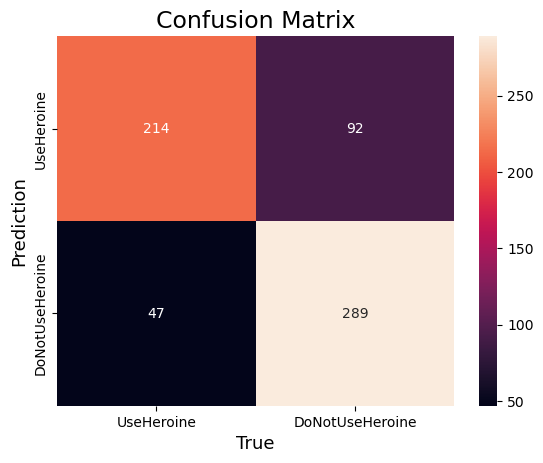

In [42]:
# Plotting confusion martix
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['UseHeroine','DoNotUseHeroine'],
            yticklabels=['UseHeroine','DoNotUseHeroine'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('True',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [43]:
from sklearn.metrics import recall_score, accuracy_score
rcl_score = round(recall_score(y_true = y_test, y_pred = y_predict),2)
acc_score = round(accuracy_score(y_test, y_predict), 2)

print(f"Recall score of Random Forest {rcl_score}")
print(f"In the case of Recall score = {rcl_score * 100} %  means that the classification model correctly identified {rcl_score * 100} % of the true positive cases out of all the true positive cases in the test dataset.")
print(f"______________")

print(f"Accuracy of Random Forest {acc_score}")
print(f"In the case of accuracy score = {acc_score  * 100} % of the cases in the test dataset were classified correctly by the model.")

Recall score of Random Forest 0.86
In the case of Recall score = 86.0 %  means that the classification model correctly identified 86.0 % of the true positive cases out of all the true positive cases in the test dataset.
______________
Accuracy of Random Forest 0.78
In the case of accuracy score = 78.0 % of the cases in the test dataset were classified correctly by the model.
